<a href="https://colab.research.google.com/github/KnOMM/ML/blob/main/lnu_summer_school_ml_master.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LNU AI Summer School 2022: Methods of supervised and unsupervised machine learning

## Introduction

This notebook will guide us through the main stages of any machine learning project, namely:
- Data searching
- Data processing and visualization
- Model selection and initialization
- Model training and evaluation

This will be performed for a variety of supervised and unsupervised algorithms

In [1]:
# For visualization
import matplotlib.pyplot as plt

# For working with matrices, vectors and linear algebra operations
import numpy as np

# A library of ready-to-use datasets for simple ML examples
from sklearn import datasets

## Supervised learning

### Linear Regression

![](https://upload.wikimedia.org/wikipedia/commons/b/be/Normdist_regression.png)

In statistics, linear regression is a linear approach for modelling the relationship between a scalar response and one or more explanatory variables. The case of one explanatory variable is called simple linear regression; for more than one, the process is called multiple linear regression (C) Wiki

In [2]:
from sklearn import linear_model

# Metrics to assess the performance level of the model
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

In [3]:
# Load the diabetes dataset
# Ten baseline variables (X): age, sex, body mass index, average blood pressure and six blood serum measurements  were obtained for 
# 442 diabetes patients, as well as the response of interest (y)
# a quantitative measure of disease progression one year after baseline.

diabetes = datasets.load_diabetes()

diabetes_X, diabetes_y = diabetes.data, diabetes.target

In [4]:
print(f"We have {len(diabetes_X)} data samples in general")

We have 442 data samples in general


In [5]:
print(f"Sample data {diabetes_X[0]}")

Sample data [ 0.03807591  0.05068012  0.06169621  0.02187235 -0.0442235  -0.03482076
 -0.04340085 -0.00259226  0.01990842 -0.01764613]


In [26]:
# Reserve some data for evaluation, use the rest for training

# # #
# Note: Try to change the parameters and see how does it
# affect the model training

train_fraction = 0.6 # (train_fraction * 100)% of data goes for training
test_fraction = 1 - train_fraction # The rest goes for evaluation

# # #


train_idx_end = int(len(diabetes_X) * train_fraction)

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:train_idx_end]
diabetes_X_test = diabetes_X[train_idx_end:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes_y[:train_idx_end]
diabetes_y_test = diabetes_y[train_idx_end:]

In [27]:
# Create an "empty" linear regression model 
lr_model = linear_model.LinearRegression()


# # #
# Note: Try to use other algorithms and compare
# them to the classical linear regression
# Also, you can try to change their parameters and see
# how it affects the performance of the model


# Ridge regression is a method of estimating the coefficients of 
# multiple-regression models in scenarios where linearly independent variables 
# are highly correlated. It has been used in many fields 
# including econometrics, chemistry, and engineering.
# lr_model = linear_model.Ridge()


# In statistics and machine learning, lasso (least absolute shrinkage and 
# selection operator; also Lasso or LASSO) is a regression analysis method that 
# performs both variable selection and *regularization* in order to enhance the 
# prediction accuracy and interpretability of the resulting statistical model.
# lr_model = linear_model.Lasso()


# Check other models here: 
# https://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model

# # #

In [28]:
# Train the model using the training sets
lr_model.fit(diabetes_X_train, diabetes_y_train)

LinearRegression()

In [29]:
# Make predictions using the testing set
diabetes_y_pred = lr_model.predict(diabetes_X_test)

In [30]:
# The coefficients
print("Weights: \n", lr_model.coef_)

# The mean squared error (MSE)
print("Mean squared error: %.2f" % mean_squared_error(diabetes_y_test, diabetes_y_pred))

# The coefficient of determination: 1 is perfect prediction
# R2 score denotes the proportion of the variance in the dependent variable 
# that is predictable from the independent variable
print("Coefficient of determination: %.2f" % r2_score(diabetes_y_test, diabetes_y_pred))

Weights: 
 [ -86.29259893 -211.08490843  566.55345535  232.49398063 -655.77679204
  235.48781498  130.97970252  226.70661728  730.06817463  171.008519  ]
Mean squared error: 3085.38
Coefficient of determination: 0.47


Generated a subsample with indicies
[ 84 147 156  74  81  68  46 131 111  69  66 174 148 140   3  39  93  54
  78 142  72 114 155 150 112  79  42 176 143 157]


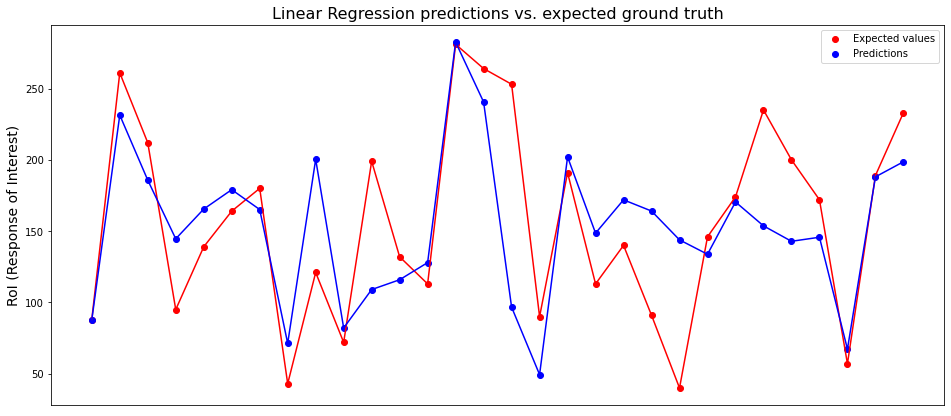

In [19]:
# Plot outputs
idx = np.random.choice(np.arange(len(diabetes_y_test)), 30, replace=False)
print(f"Generated a subsample with indicies\n{idx}") 

plt.figure(figsize = (16, 7))
plt.plot(list(range(len(idx))), diabetes_y_test[idx], color="red")
plt.plot(list(range(len(idx))), diabetes_y_pred[idx], color="blue")

plt.scatter(list(range(len(idx))), diabetes_y_test[idx], color="red", label = "Expected values")
plt.scatter(list(range(len(idx))), diabetes_y_pred[idx], color="blue", label = "Predictions")

plt.xticks(())
plt.ylabel("RoI (Response of Interest)", size = 14)
plt.legend()
plt.title("Linear Regression predictions vs. expected ground truth", size = 16)

plt.show()

### Logistic Regression for Digit Recognition

In [12]:
from sklearn.datasets import load_digits

In [13]:
# Load dataset for digit classification problem
digits_data = load_digits()
digits_X, digits_y = digits_data.data, digits_data.target

In [14]:
print(f"We have {len(digits_X)} data samples in general")

We have 1797 data samples in general


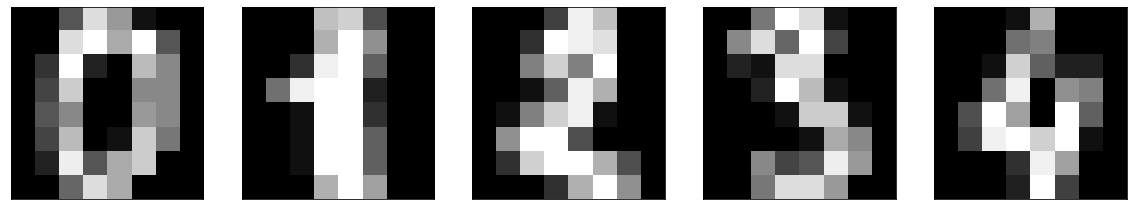

In [15]:
plt.figure(figsize=(20,4))

for index, (image, label) in enumerate(zip(digits_data.data[0:5], digits_data.target[0:5])):
  plt.subplot(1, 5, index + 1)
  plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
  plt.xticks([])
  plt.yticks([])

In [31]:
# Reserve some data for evaluation, use the rest for training

# # #
# Note: Try to change the parameters and see how does it
# affect the model training

train_fraction = 0.85 # (train_fraction * 100)% of data goes for training
test_fraction = 1 - train_fraction # The rest goes for evaluation

# # #


train_idx_end = int(len(digits_X) * train_fraction)

In [32]:
# Split the data into training/testing sets
digits_X_train = digits_X[:train_idx_end]
digits_X_test = digits_X[train_idx_end:]

# Split the targets into training/testing sets
digits_y_train = digits_y[:train_idx_end]
digits_y_test = digits_y[train_idx_end:]

In [33]:
# # #
# Note: Try to change the parameters and see how does it
# affect the model training
# To learn more about the parameters check documentation
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

penalty_method = 'l1' # Possible: l1, l2, elasticnet
regularization_value = 1.0 # Inverse of regularization strength; must be a positive float. Smaller values specify stronger regularization.
solver = 'liblinear' # Pay attention to compatibility, check docs
max_iter = 100

# # #

In [34]:
# Load and initialize the model

from sklearn.linear_model import LogisticRegression


log_r_model = LogisticRegression(penalty = penalty_method,
                                 C = regularization_value,
                                 solver = solver,
                                 max_iter = max_iter)

In [35]:
log_r_model.fit(digits_X_train, digits_y_train)

LogisticRegression(penalty='l1', solver='liblinear')

In [36]:
# Make predictions using the testing set
digits_y_pred = log_r_model.predict(digits_X_test)

In [37]:
# Calculate error metric, in this case it's accuracy
# Accuracy denots the fraction of correct predictions
# to the general amount of predictions
score = log_r_model.score(digits_X_test, digits_y_test)
print(f"Accuracy: {str(round(score * 100, 2))}%")

Accuracy: 89.63%


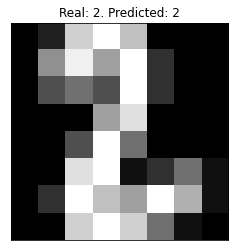

In [48]:
idx = np.random.randint(0, len(digits_X_test))

plt.imshow(np.reshape(digits_X_test[idx], (8,8)), cmap=plt.cm.gray)
plt.title(f"Real: {digits_y_test[idx]}. Predicted: {digits_y_pred[idx]}")
plt.xticks([])
plt.yticks([])
plt.show()

In [49]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [50]:
cm = confusion_matrix(digits_y_test, digits_y_pred)

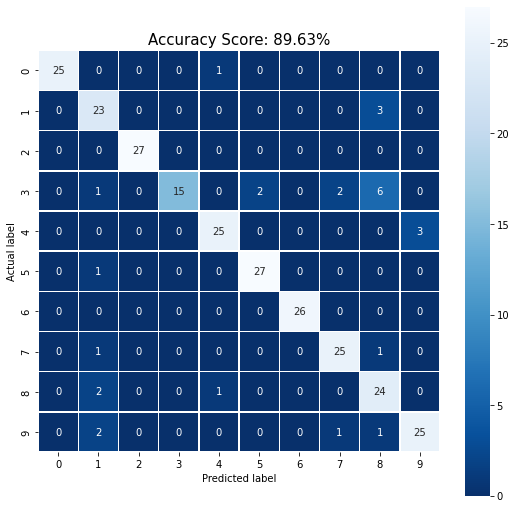

In [51]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}%'.format(str(round(score * 100, 2)))
plt.title(all_sample_title, size = 15);

### K-Nearest Neighbours (kNN)

KNN can be summarized as below:

- Computes the distance between the new data point with every training example.
- For computing the distance measures such as Euclidean distance, Hamming distance or Manhattan distance will be used.
- Model picks K entries in the database which are closest to the new data point.
- Then it does the majority vote i.e the most common class/label among those K entries will be the class of the new data point.

Sanjay

In [ ]:
# Load the dataset for classification, we will use so-called Iris dataset
# Iris dataset has 50 samples for each different species of Iris flower(total of 150). 
# For each sample we have sepal length, width and petal length and width and a species name(class/label).

from sklearn.datasets import load_iris

In [ ]:
iris = load_iris()

In [ ]:
iris_X, iris_y = iris.data, iris.target
print(f"We have {len(iris_X)} data samples")

We have 150 data samples


In [ ]:
print(f"Possible labels: {np.unique(iris_y)}")

Possible labels: [0 1 2]


In [ ]:
# Reserve some data for evaluation, use the rest for training

# # #
# Note: Try to change the parameters and see how does it
# affect the model training

train_fraction = 0.85 # (train_fraction * 100)% of data goes for training
test_fraction = 1 - train_fraction # The rest goes for evaluation
k = 3
weights = 'uniform' # Possible: 'uniform, 'distance' 
# 'uniform' : uniform weights. All points in each neighborhood are weighted equally.
# 'distance' : weight points by the inverse of their distance. in this case, 
# closer neighbors of a query point will have a greater influence than neighbors which are further away.


# # #


train_idx_end = int(len(iris_X) * train_fraction)

In [ ]:
# Split the data into training/testing sets
iris_X_train = iris_X[:train_idx_end]
iris_X_test = iris_X[train_idx_end:]

# Split the targets into training/testing sets
iris_y_train = iris_y[:train_idx_end]
iris_y_test = iris_y[train_idx_end:]

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# Load and initialize the model
knn = KNeighborsClassifier(n_neighbors=k, weights = weights)

In [ ]:
knn.fit(iris_X_train, iris_y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
# Make predictions using the testing set
iris_y_pred = knn.predict(iris_X_test)

In [ ]:
# Calculate error metric, in this case it's accuracy
# Accuracy denots the fraction of correct predictions
# to the general amount of predictions
score = knn.score(iris_X_test, iris_y_test)
print(f"Accuracy: {str(round(score * 100, 2))}%")

Accuracy: 91.3%


## Unsupervised learning

### Principal Component Analysis

Principal component analysis, or PCA, is a statistical procedure that allows you to summarize the information content in large data tables by means of a smaller set of “summary indices” that can be more easily visualized and analyzed.

Wiki

In [ ]:
from sklearn.datasets import load_digits

# Load dataset for digit classification problem
digits_data = load_digits()
digits_X, digits_y = digits_data.data, digits_data.target

In [ ]:
print(f"We have {len(digits_X)} data samples in general")

We have 1797 data samples in general


In [ ]:
(n_samples, n_features), n_digits = digits_X.shape, np.unique(digits_y).size
print(f"# digits: {n_digits}; # samples: {n_samples}; # features {n_features}")

# digits: 10; # samples: 1797; # features 64


In [ ]:
from sklearn.decomposition import PCA

In [ ]:
# PCA will allow us to project high-dimensional data into lower dimensions
# for training and visualization convenience
pca = PCA(n_components=n_digits).fit(digits_X)

### K-Means Clustering 

In [ ]:
# # #
# Note: Try to change the parameters and see how does it
# affect the model training
# To learn more about the parameters check documentation
# https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
init = 'k-means++' # Options are 'random' (selected from data) and 'k-means++'
n_init = 10 # Number of times k-Means will be run with different centroids initialized
max_iter = 150
 
# # #

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
# Standard
k_means = KMeans(n_clusters = n_digits,
                 init = init, 
                 n_init = n_init,
                 max_iter = max_iter)


# Reduced data version
# k_means = KMeans(n_clusters = n_digits,
#                  init = pca.components_, 
#                  n_init = 1,
#                  max_iter = max_iter)

In [ ]:
k_means.fit(digits_X)

KMeans(max_iter=150, n_clusters=10)

In [ ]:
digits_y_pred = k_means.predict(digits_X)

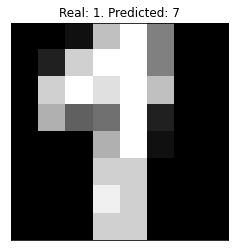

In [ ]:
idx = np.random.randint(0, len(digits_X))

plt.imshow(np.reshape(digits_X[idx], (8,8)), cmap=plt.cm.gray)
plt.title(f"Real: {digits_y[idx]}. Predicted: {digits_y_pred[idx]}")
plt.xticks([])
plt.yticks([])
plt.show()

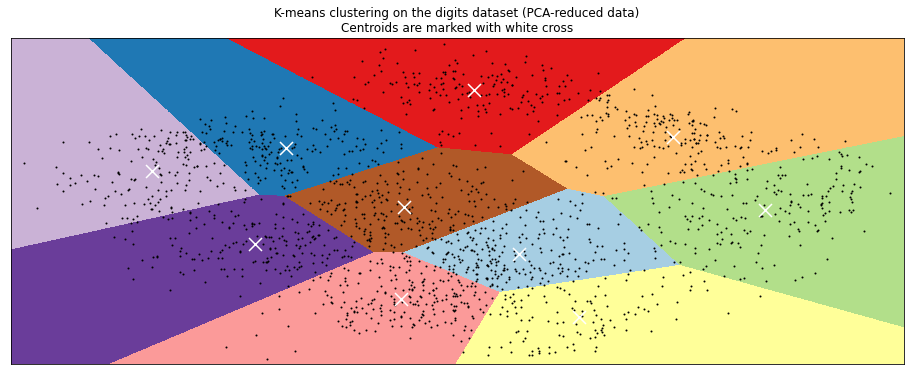

In [ ]:
import matplotlib.pyplot as plt

reduced_data = PCA(n_components=2).fit_transform(digits_X)
kmeans = KMeans(init="k-means++", n_clusters=n_digits, n_init=4)
kmeans.fit(reduced_data)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = 0.02  # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)

plt.figure(figsize = (16, 6))
plt.clf()
plt.imshow(
    Z,
    interpolation="nearest",
    extent=(xx.min(), xx.max(), yy.min(), yy.max()),
    cmap=plt.cm.Paired,
    aspect="auto",
    origin="lower",
)

plt.plot(reduced_data[:, 0], reduced_data[:, 1], "k.", markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    marker="x",
    s=169,
    linewidths=3,
    color="w",
    zorder=10,
)
plt.title(
    "K-means clustering on the digits dataset (PCA-reduced data)\n"
    "Centroids are marked with white cross"
)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

### Neural Networks

In [ ]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.8.2


In [ ]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
# Normalize RGB images by dividing each channel by the max. value of R, G, B range
x_train, x_test = x_train / 255.0, x_test / 255.0

In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # Transforms input image (28, 28) into a vector
  tf.keras.layers.Dense(128, activation='relu'), # Fully-connected layer with 128 neurons 
  # tf.keras.layers.Dropout(0.2),  # Dropout is used to help the model during training by adding some uncertainty
  tf.keras.layers.Dense(10) # Fully-connected layer, each neuron outputs the probability of the image containint a digit (0-9)
])

In [ ]:
# Define loss function (error calculation to help the model find the unknown function f(x))
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True) # Categorial error, we have 10 categories (classes)

In [ ]:
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

In [ ]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2621 - accuracy: 0.9240
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1153 - accuracy: 0.9658
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0789 - accuracy: 0.9762
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0583 - accuracy: 0.9820
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0443 - accuracy: 0.9864


In [ ]:
model.evaluate(x_test,  y_test, verbose=2)

313/313 - 1s - loss: 0.0719 - accuracy: 0.9777 - 520ms/epoch - 2ms/step


[0.07192297279834747, 0.9776999950408936]

## Additional resources

**Regression**:
- Lasso (https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html) 
- Ridge (https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html)

Understand how to select type of regression, based on your data and data properties.



**Clustering**

- Mean-Shift(https://scikit-learn.org/stable/modules/clustering.html#mean-shift)
- DBSCAN (https://scikit-learn.org/stable/modules/clustering.html#dbscan) 
- Mixture of Gaussians (https://scikit-learn.org/stable/modules/mixture.html#mixture)


TensorFlow 2 guide for beginners
https://www.tensorflow.org/tutorials/quickstart/beginner

TensorFlow 2 tutorials
https://www.tensorflow.org/tutorials

Supervised ML Course
https://www.coursera.org/learn/machine-learning

Deeper dive into ML concepts, how the algorithms are derived, loss functions (more Calculus and LinAlg)
https://www.deeplearning.ai/courses/machine-learning-specialization/

Training and penalizing ML models
https://developers.google.com/machine-learning/crash-course/descending-into-ml/training-and-loss